In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()


In [2]:
application_train = pd.read_csv('application_train.csv')
previous_application = pd.read_csv('previous_application.csv')
application_test = pd.read_csv('application_test.csv')

In [3]:
print('Size of application_train data', application_train.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of application_test data', application_train.shape)

Size of application_train data (307511, 122)
Size of previous_application data (1670214, 37)
Size of application_test data (307511, 122)


In [4]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [6]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

# Missing Data

In [8]:
# checking missing data - Training
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [9]:
# checking missing data - Previous
total = previous_application.isnull().sum().sort_values(ascending = False)
percent = (previous_application.isnull().sum()/previous_application.isnull().count()*100).sort_values(ascending = False)
missing_previous_application_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_previous_application_data.head(15)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


# Data Exploration

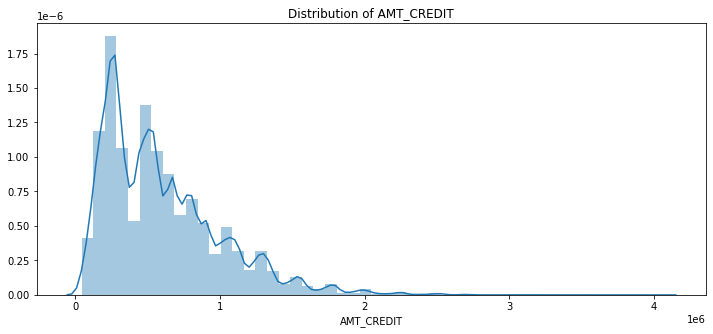

In [10]:
#Credit amount of the loan
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(application_train["AMT_CREDIT"])

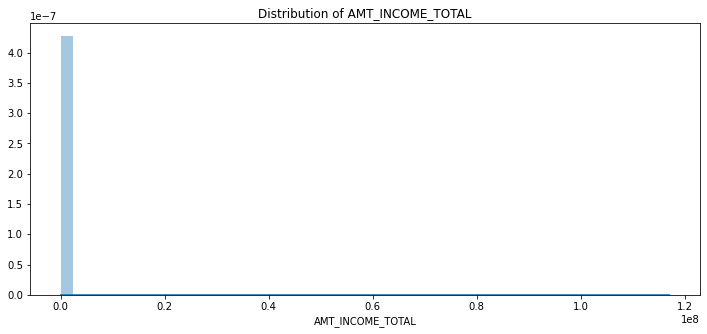

In [11]:
#Income of the client
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(application_train["AMT_INCOME_TOTAL"].dropna())

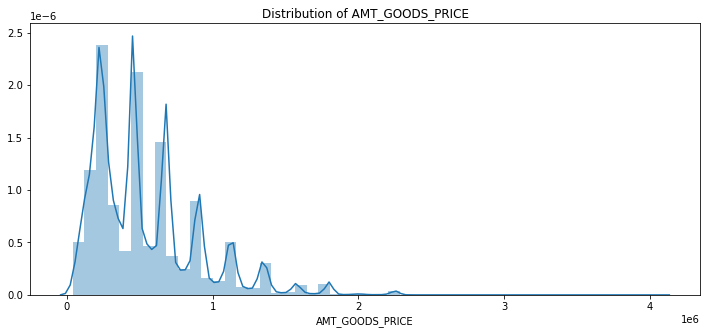

In [12]:
#For consumer loans it is the price of the goods for which the loan is given
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(application_train["AMT_GOODS_PRICE"].dropna())

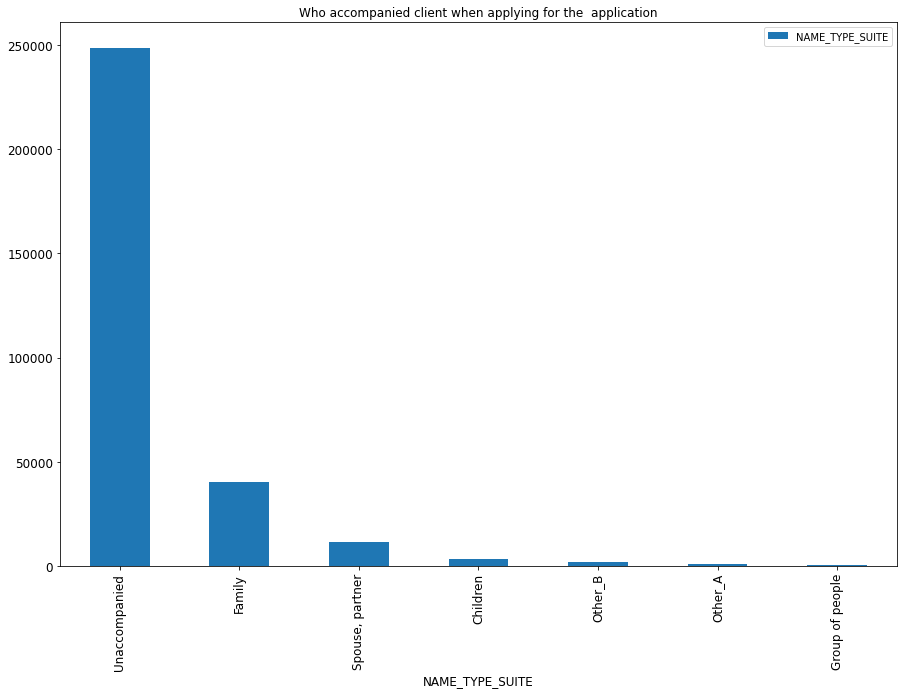

In [13]:
#Who was accompanying client when he was applying for the loan
ax = application_train["NAME_TYPE_SUITE"].value_counts().plot(kind='bar', title ="Who accompanied client when applying for the  application", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("NAME_TYPE_SUITE", fontsize=12)
plt.show()

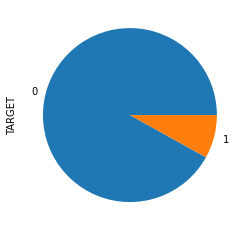

In [14]:
#Data Imbalanced or Not 0- Repaid , 1 - Not 
application_train["TARGET"].value_counts().plot(kind='pie')


As we can see data is highly imbalanced.

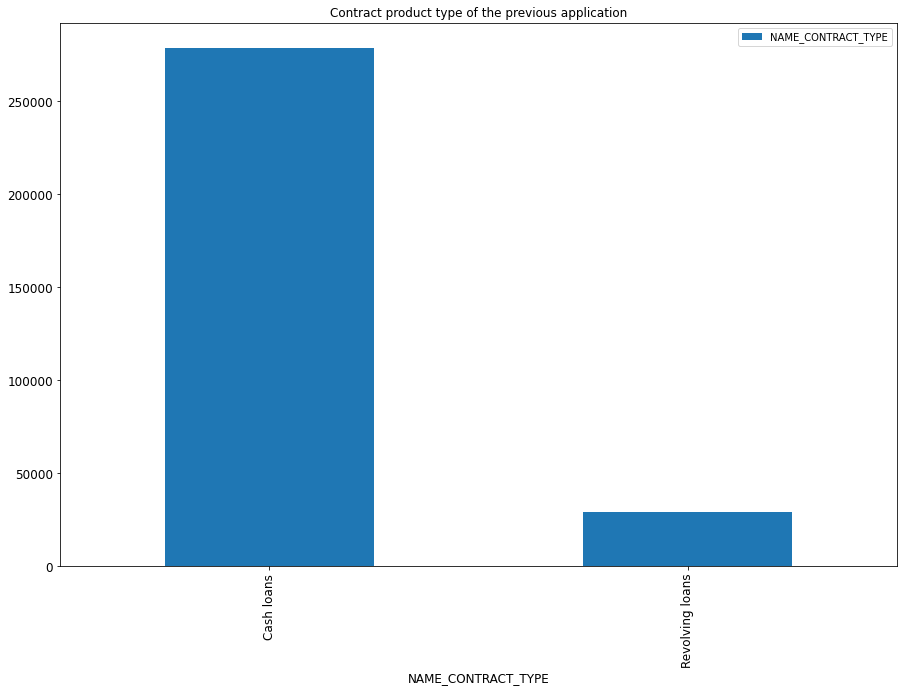

In [15]:
#Type Of Loan -Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application
ax = application_train["NAME_CONTRACT_TYPE"].value_counts().plot(kind='bar', title ="Contract product type of the previous application", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("NAME_CONTRACT_TYPE", fontsize=12)
plt.show()



Most of the loans are Cash loans which were taken by applicants.

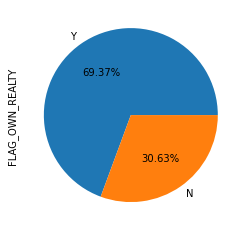

In [16]:
#Purpose Of Loan - Own Realty
application_train["FLAG_OWN_REALTY"].value_counts().plot(kind='pie',autopct='%1.2f%%')


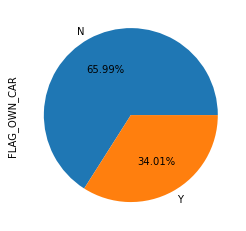

In [17]:
#Purpose Of Loan - Own Car
application_train["FLAG_OWN_CAR"].value_counts().plot(kind='pie' , autopct='%1.2f%%')


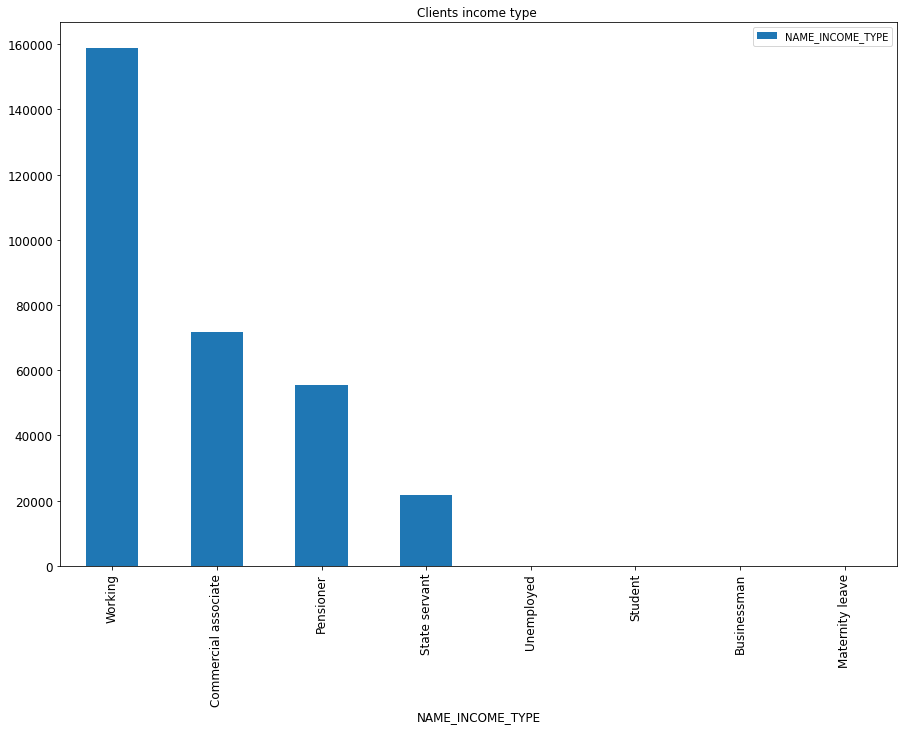

In [18]:
#Clients income type (businessman, working, maternity leave,…)
ax = application_train["NAME_INCOME_TYPE"].value_counts().plot(kind='bar', title ="Clients income type ", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("NAME_INCOME_TYPE", fontsize=12)
plt.show()

Top 3 ratios go like Working , Commercial & Pesnioner

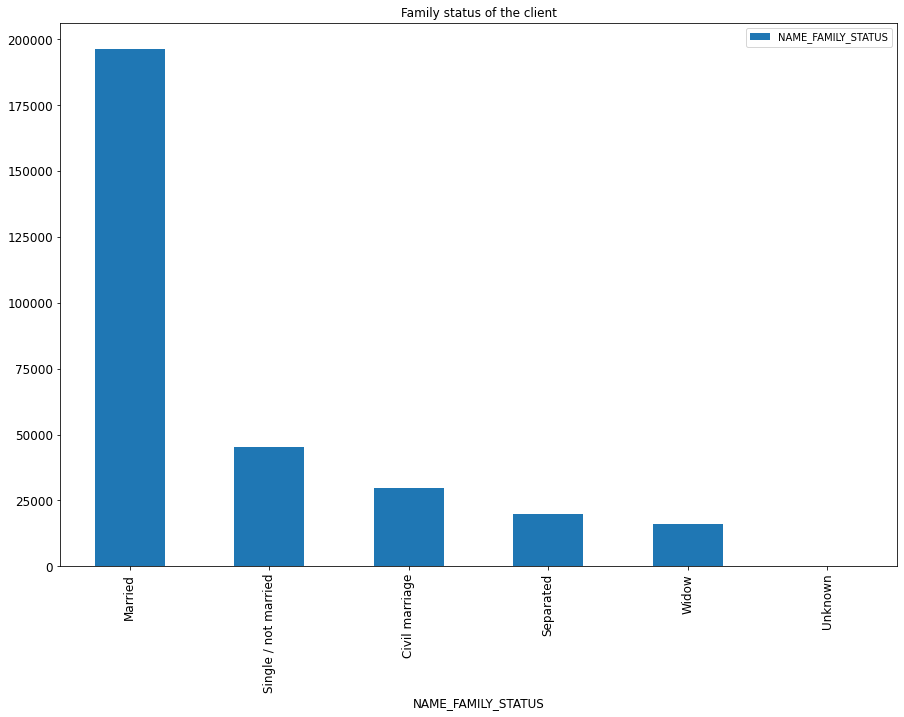

In [19]:
#Family status of the client
ax = application_train["NAME_FAMILY_STATUS"].value_counts().plot(kind='bar', title ="Family status of the client", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("NAME_FAMILY_STATUS", fontsize=12)
plt.show()

#Most of the applicants are Married 

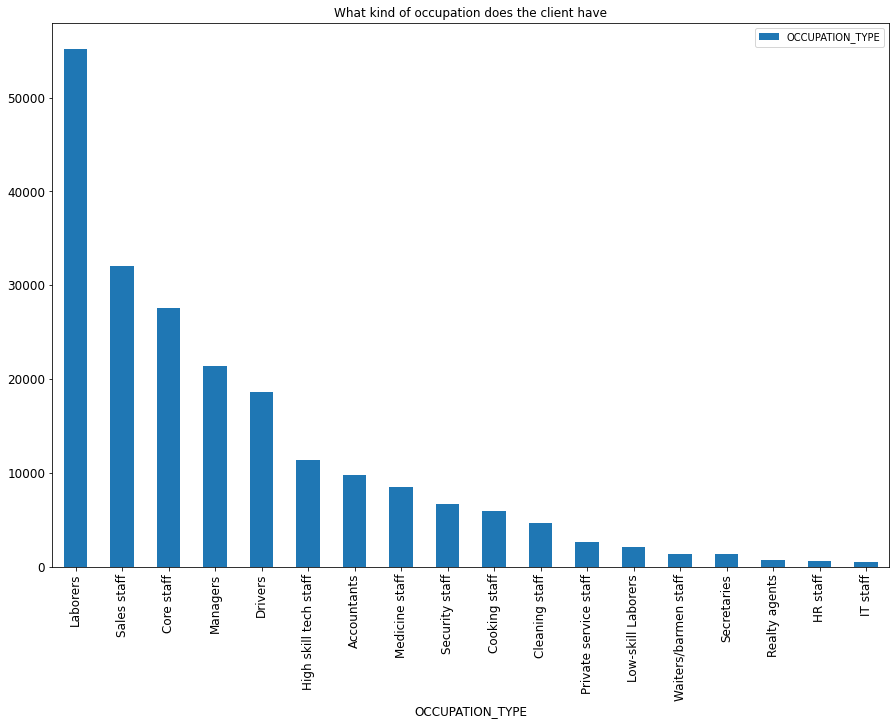

In [20]:
#What kind of occupation does the client have
ax = application_train["OCCUPATION_TYPE"].value_counts().plot(kind='bar', title ="What kind of occupation does the client have", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("OCCUPATION_TYPE", fontsize=12)
plt.show()


 Top Applicant's who applied for loan :
Laborers - Apprx. 55 K
Sales Staff - Approx. 32 K
Core staff - Approx. 28 K
Managers - Approx. 21 K
Drivers - Approx. 19 K

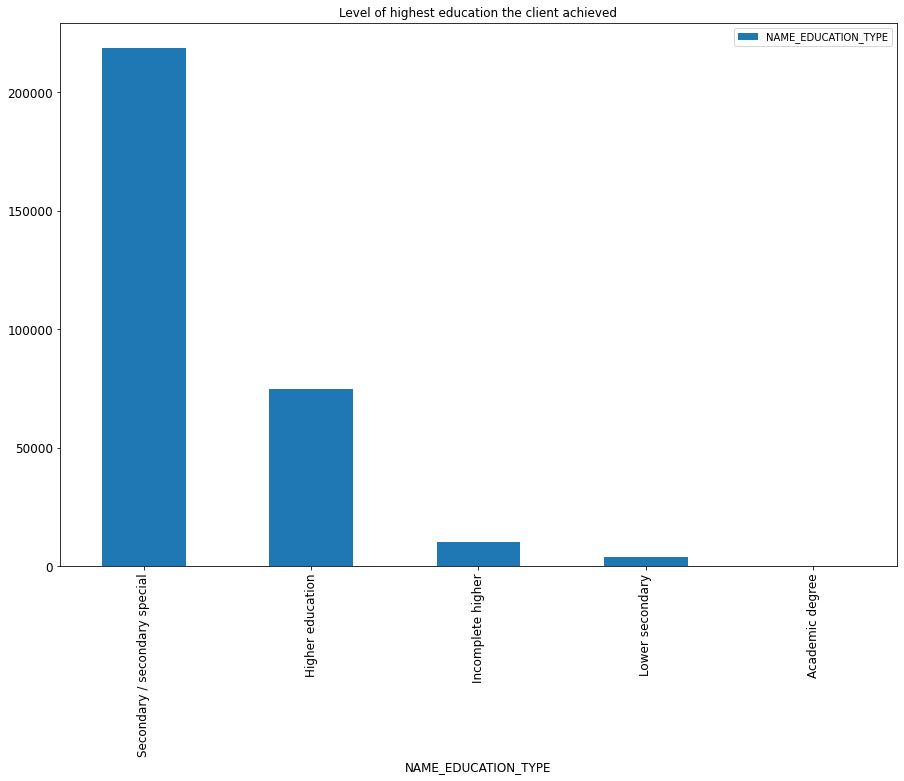

In [21]:
#Level of highest education the client achieved
ax = application_train["NAME_EDUCATION_TYPE"].value_counts().plot(kind='bar', title ="Level of highest education the client achieved", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("NAME_EDUCATION_TYPE", fontsize=12)
plt.show()

Majority of applicants have secondary and 2nd most having higher education.


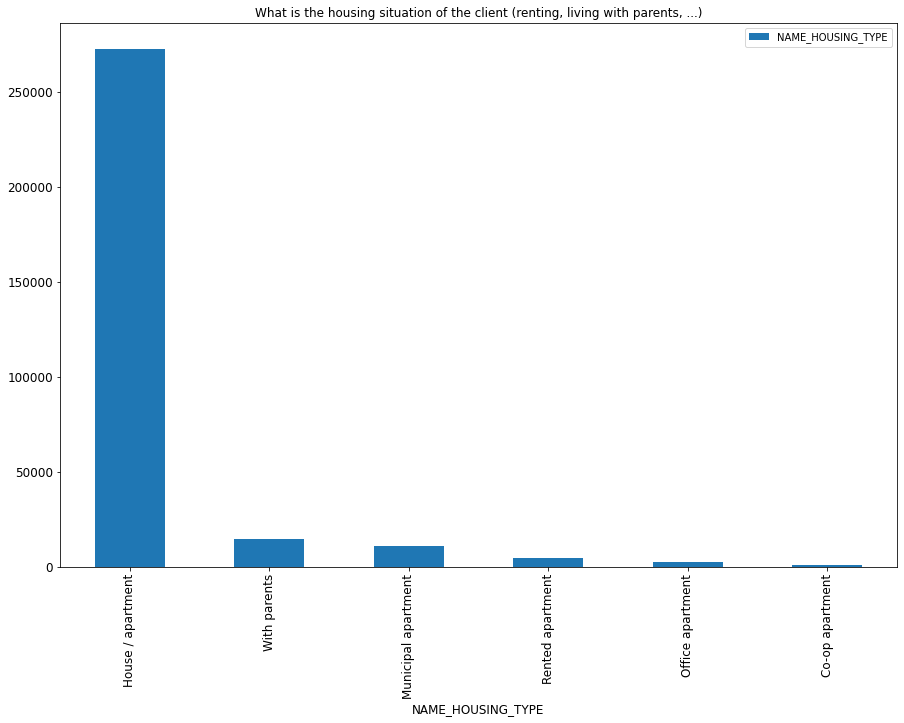

In [22]:
#What is the housing situation of the client (renting, living with parents, ...)
ax = application_train["NAME_HOUSING_TYPE"].value_counts().plot(kind='bar', title ="What is the housing situation of the client (renting, living with parents, ...)", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("NAME_HOUSING_TYPE", fontsize=12)
plt.show()

Approx. 90 % peoples applied for loan, they mentioned type of house is House / Appartment

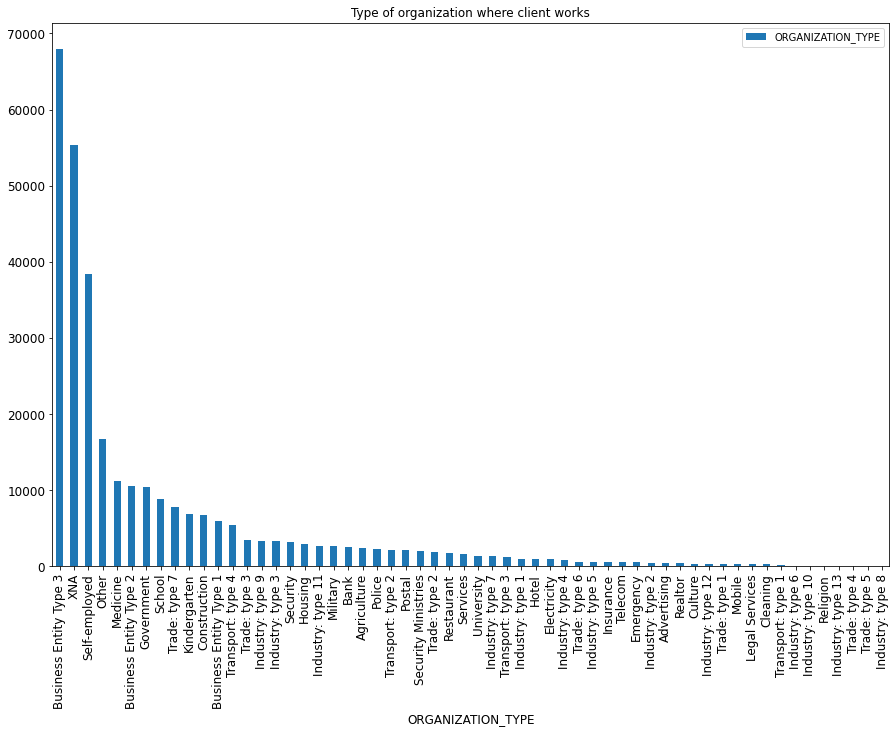

In [23]:
#Type of organization where client works
ax = application_train["ORGANIZATION_TYPE"].value_counts().plot(kind='bar', title ="Type of organization where client works", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("ORGANIZATION_TYPE", fontsize=12)
plt.show()

Business Entity Type 3 - Approx. 68 K
XNA - Approx. 55 K
Self employed - Approx. 38 K
Others - Approx. 17 K
Medicine - Approx. 11 K

## Exploration in Terms of Loan Repayed or Not

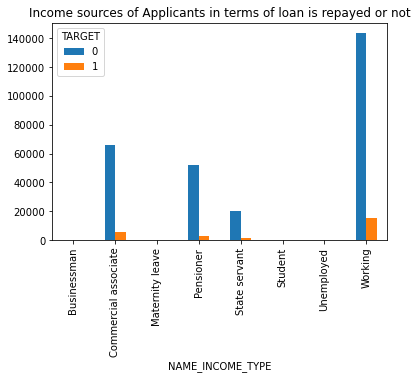

In [24]:
#Income sources of Applicant's in terms of loan is repayed or not
test=application_train.groupby(['NAME_INCOME_TYPE','TARGET']).size()
test=test.unstack()
test.plot(kind='bar', title='Income sources of Applicants in terms of loan is repayed or not')

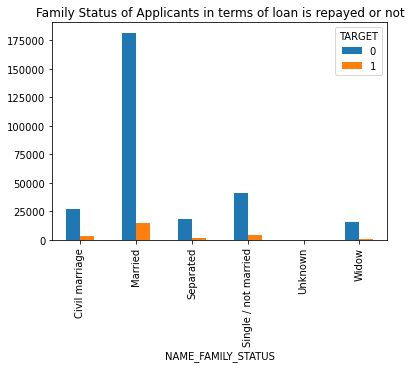

In [25]:
#Family Status of Applicants in terms of loan is repayed or not
test=application_train.groupby(['NAME_FAMILY_STATUS','TARGET']).size()
test=test.unstack()
test.plot(kind='bar', title='Family Status of Applicants in terms of loan is repayed or not')

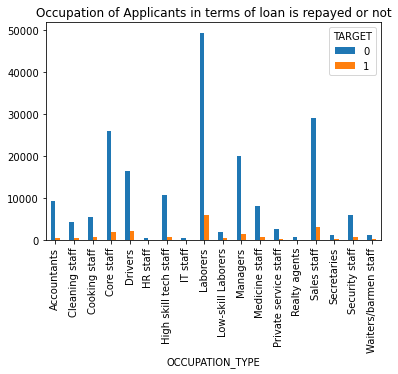

In [26]:
#Occupation of Applicants in terms of loan is repayed or not
test=application_train.groupby(['OCCUPATION_TYPE','TARGET']).size()
test=test.unstack()
test.plot(kind='bar', title='Occupation of Applicants in terms of loan is repayed or not')

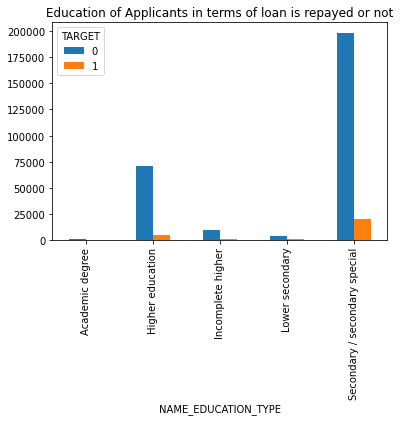

In [27]:
#Education of Applicants in terms of loan is repayed or not
test=application_train.groupby(['NAME_EDUCATION_TYPE','TARGET']).size()
test=test.unstack()
test.plot(kind='bar', title='Education of Applicants in terms of loan is repayed or not')

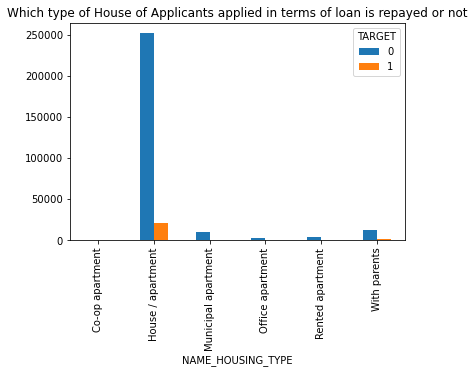

In [28]:
#Which type of House of Applicants applied in terms of loan is repayed or not
test=application_train.groupby(['NAME_HOUSING_TYPE','TARGET']).size()
test=test.unstack()
test.plot(kind='bar', title='Which type of House of Applicants applied in terms of loan is repayed or not')

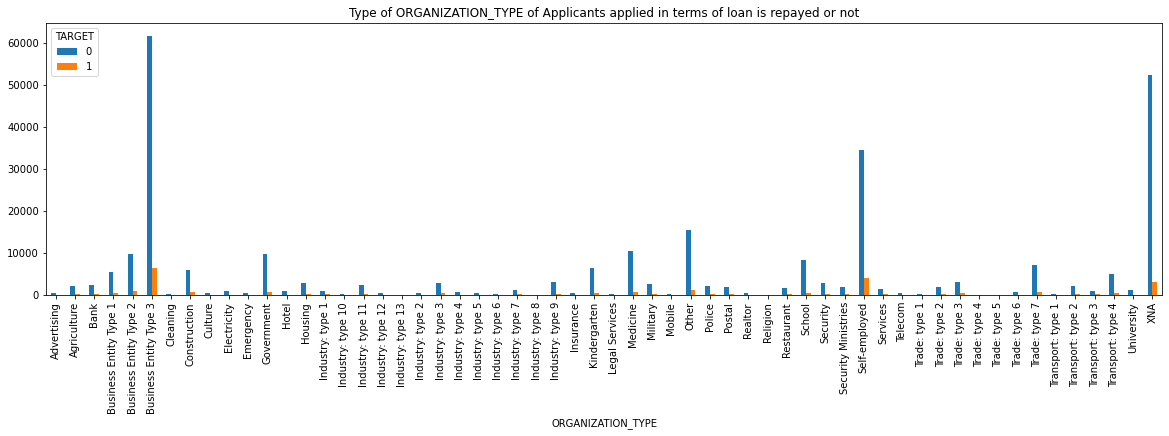

In [29]:
# type of ORGANIZATION TYPE of Applicants applied in terms of loan is repayed or not
test=application_train.groupby(['ORGANIZATION_TYPE','TARGET']).size()
test=test.unstack()
test.plot(kind='bar', title='Type of ORGANIZATION_TYPE of Applicants applied in terms of loan is repayed or not',figsize=(20,5))

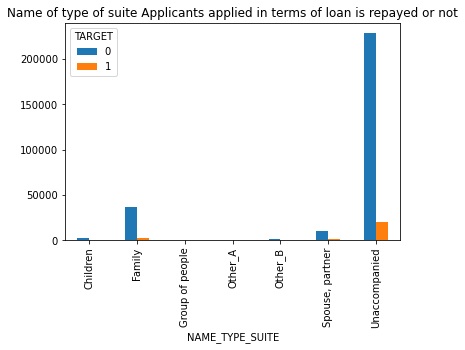

In [30]:
#WName of type of suite of Applicants applied in terms of loan is repayed or not
test=application_train.groupby(['NAME_TYPE_SUITE','TARGET']).size()
test=test.unstack()
test.plot(kind='bar', title='Name of type of suite Applicants applied in terms of loan is repayed or not')

## Exploration of Previous Application data

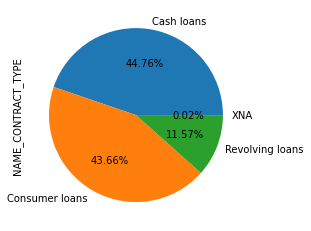

In [31]:
#Contract product type of previos loans
previous_application["NAME_CONTRACT_TYPE"].value_counts().plot(kind='pie' , autopct='%1.2f%%')


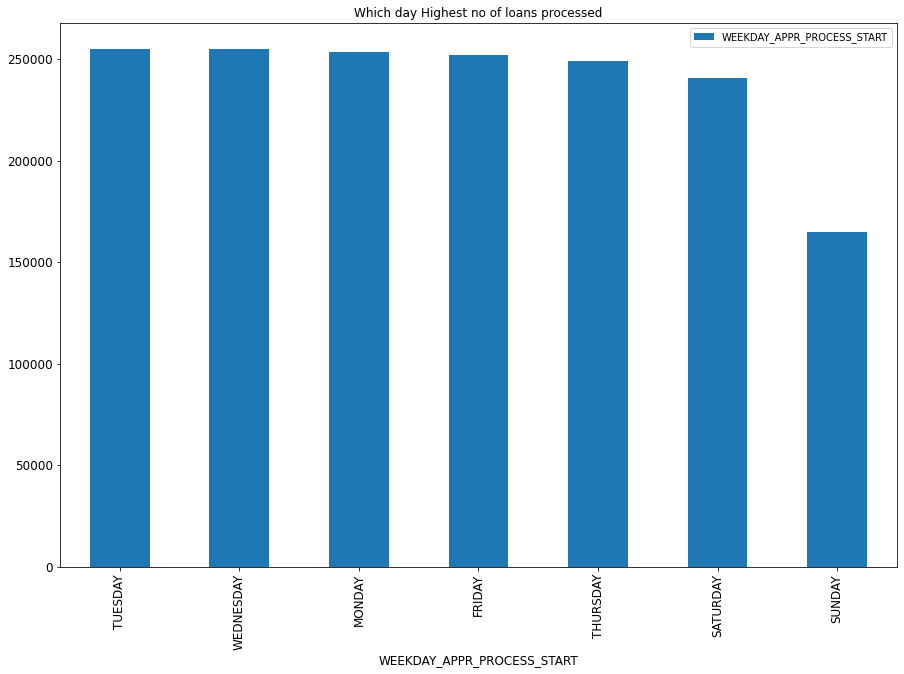

In [32]:
#Which day Highest no of loans processed
ax = previous_application["WEEKDAY_APPR_PROCESS_START"].value_counts().plot(kind='bar', title ="Which day Highest no of loans processed", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("WEEKDAY_APPR_PROCESS_START", fontsize=12)
plt.show()

Weekdays have more processed loan than weekend 

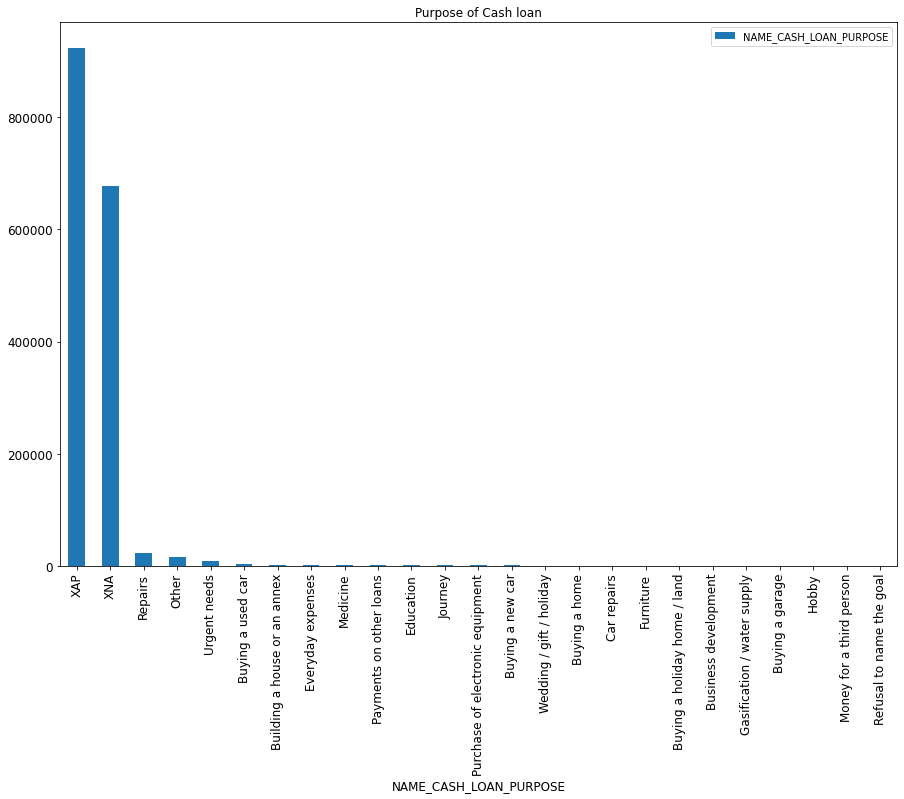

In [33]:
#purpose of Cash loan
ax = previous_application["NAME_CASH_LOAN_PURPOSE"].value_counts().plot(kind='bar', title ="Purpose of Cash loan", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("NAME_CASH_LOAN_PURPOSE", fontsize=12)
plt.show()

Major loans are not revelaed properly it's XAP & XNA

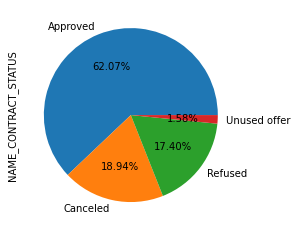

In [34]:
#Contract approved or not
previous_application["NAME_CONTRACT_STATUS"].value_counts().plot(kind='pie' , autopct='%1.2f%%')


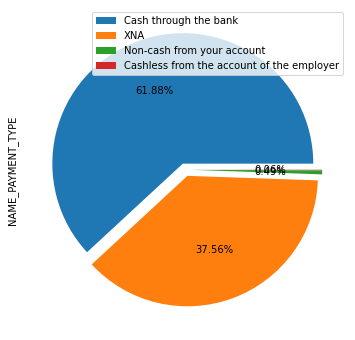

In [35]:
#payment method to use pay previous loan
distance = 0.05
separate = (distance, distance, distance, distance)
previous_application["NAME_PAYMENT_TYPE"].value_counts().plot(kind='pie',labels=None , legend=True,autopct='%1.2f%%', figsize=(10,6),explode=separate,labeldistance=1.2)


As we can most of the payment(61.9 %) has done thorugh cash only.

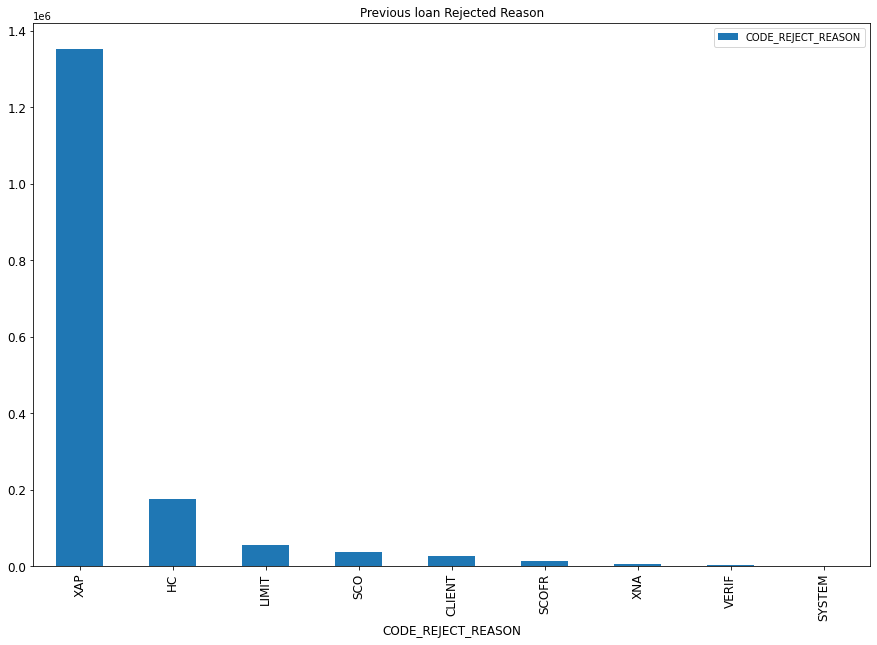

In [36]:
#Why Previous loan Rejected
ax = previous_application["CODE_REJECT_REASON"].value_counts().plot(kind='bar', title ="Previous loan Rejected Reason", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("CODE_REJECT_REASON", fontsize=12)
plt.show()

Previous loan rejected reason not revelaed properly 

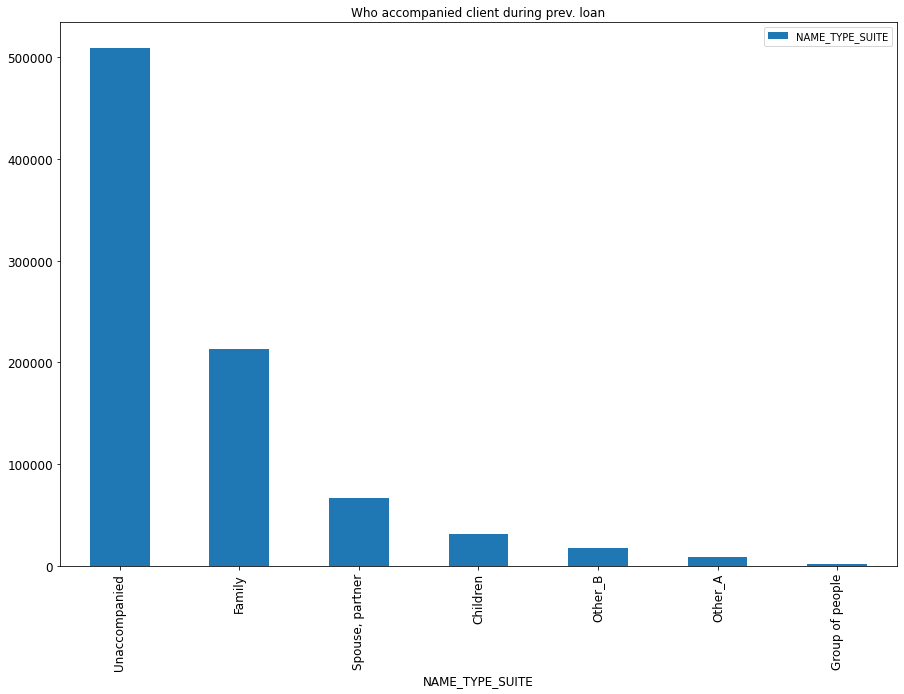

In [37]:
#previous loan _clinet accompanied
ax = previous_application["NAME_TYPE_SUITE"].value_counts().plot(kind='bar', title ="Who accompanied client during prev. loan", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("NAME_TYPE_SUITE", fontsize=12)
plt.show()

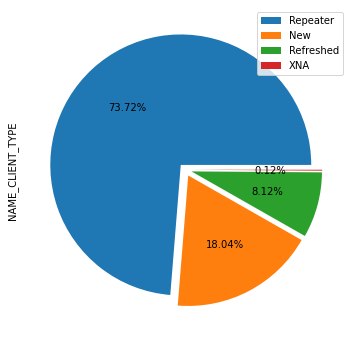

In [38]:
#Freshness of client
distance = 0.05
separate = (distance, distance, distance, distance)
previous_application["NAME_CLIENT_TYPE"].value_counts().plot(kind='pie',labels=None , legend=True,autopct='%1.2f%%', figsize=(10,6),explode=separate,labeldistance=1.2)


Majority of the clients were repeaters

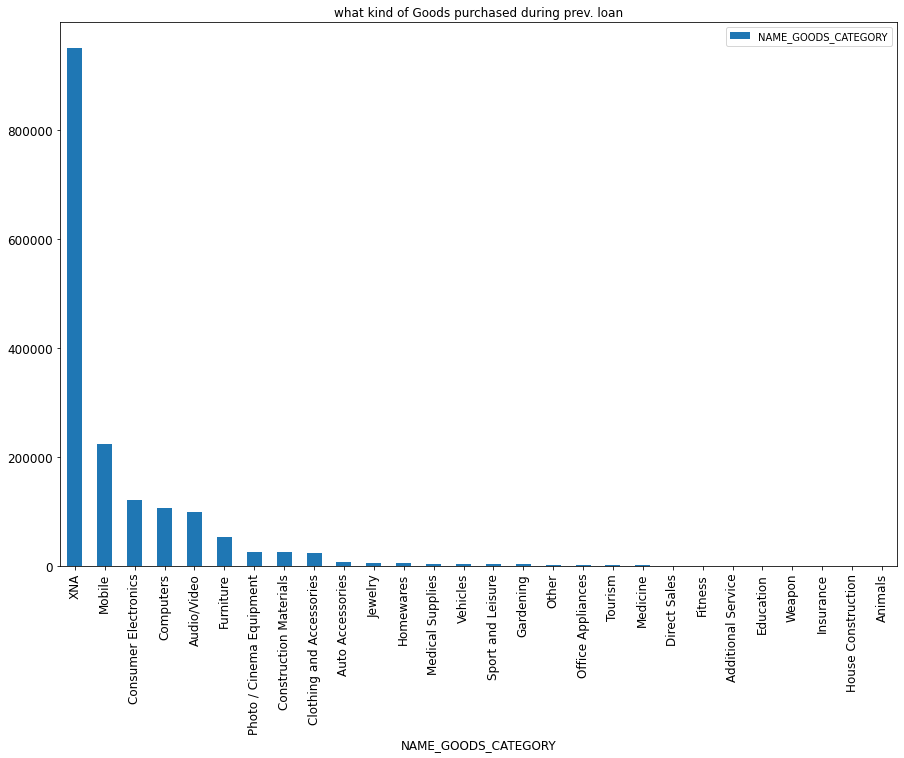

In [39]:
#previous loan _what kind of goods puechased
ax = previous_application["NAME_GOODS_CATEGORY"].value_counts().plot(kind='bar', title ="what kind of Goods purchased during prev. loan", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("NAME_GOODS_CATEGORY", fontsize=12)
plt.show()

Previous loan purchased goods reason wasn't proper for Majority of clients 

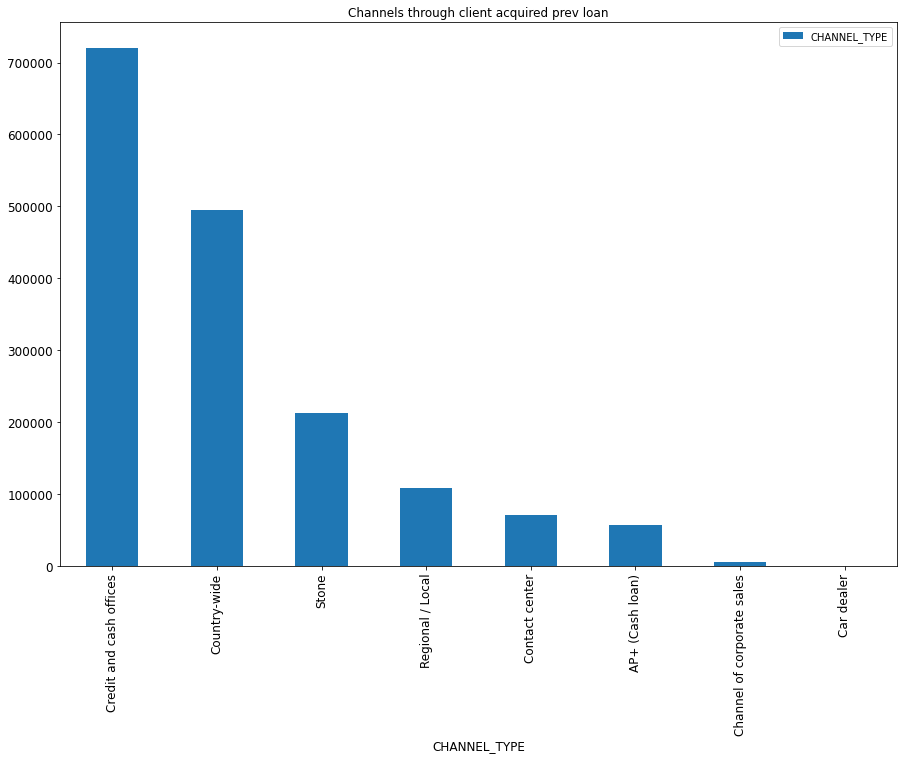

In [40]:
#Channels through client acquired prev loan
ax = previous_application["CHANNEL_TYPE"].value_counts().plot(kind='bar', title ="Channels through client acquired prev loan", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("CHANNEL_TYPE", fontsize=12)
plt.show()

Top 3  Marketing medium seems to ve Credit & cash offices , Country side , stone 

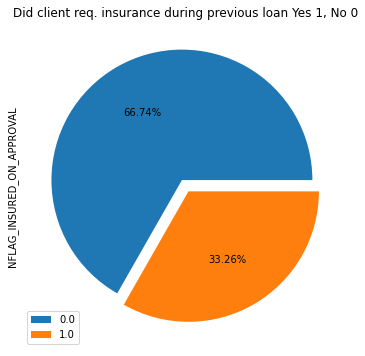

In [41]:
#Did client req. insurance during previous loan
distance = 0.05
separate = (distance, distance)
previous_application["NFLAG_INSURED_ON_APPROVAL"].value_counts().plot(kind='pie',labels=None , legend=True,autopct='%1.2f%%', figsize=(10,6),explode=separate,labeldistance=1.2 ,title='Did client req. insurance during previous loan Yes 1, No 0')


Majority of clients didn't opt for Insurance

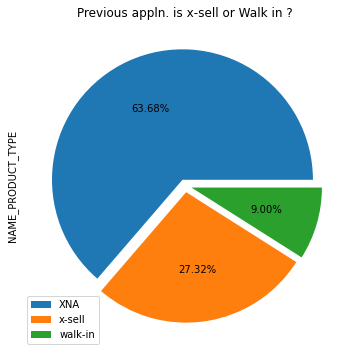

In [42]:
#Previous appln. is x-sell or Walk in ?
distance = 0.05
separate = (distance, distance,distance)
previous_application["NAME_PRODUCT_TYPE"].value_counts().plot(kind='pie',labels=None , legend=True,autopct='%1.2f%%', figsize=(10,6),explode=separate,labeldistance=1.2 ,title='Previous appln. is x-sell or Walk in ?')


Majority of the processed product type data not available

In [43]:
(application_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

### The age variable looks to be populated with no unreasonable outliers


In [44]:
(application_train['DAYS_EMPLOYED'] / -365).describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

### Something doesn't look right in the time employed variable with a negative 1000 years as the minimum variable. the max seems resonable. 


In [45]:
print(np.sum(application_train['DAYS_EMPLOYED'] > 0))
print(np.sum(application_train['DAYS_EMPLOYED'] > 0)/len(application_train['DAYS_EMPLOYED'])*100, 'percent of the train data set has negative length of employment')

55374
18.00716071945394 percent of the train data set has negative length of employment


In [46]:
mask = application_train.DAYS_EMPLOYED > 0
column_name = 'DAYS_EMPLOYED'
application_train.loc[mask, column_name] = 0

In [47]:
(application_train['DAYS_EMPLOYED'] / -365).describe()
# std of 6.3 years makes much more sense

count    307511.000000
mean          5.355748
std           6.320737
min          -0.000000
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

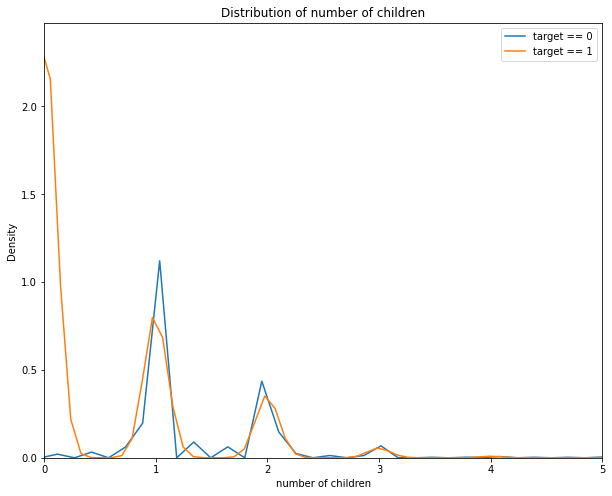

In [48]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'CNT_CHILDREN'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'CNT_CHILDREN'], label = 'target == 1')

plt.xlim(0, 5)

# Labeling of plot
plt.xlabel('number of children'); plt.ylabel('Density'); plt.title('Distribution of number of children');

Interesting to see that those who have had torubles repaying loans have mainly had zero children, although the distributions look to be similar for other children counts. 